AMV Historical Data

In [5]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [6]:
# 2. Load data
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [7]:
df

0        3700.0
1        3600.0
2        3500.0
3        3500.0
4        3500.0
         ...   
1308    14144.0
1309    14594.0
1310    14414.0
1311    14865.0
1312    15225.0
Name: Price, Length: 1313, dtype: float64

In [8]:
# 3. Split train, test
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [9]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [11]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [12]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [13]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [14]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[21309.78199703 21324.61504582 21339.44809461 21354.2811434
 21369.11419219 21383.94724098 21398.78028977 21413.61333856
 21428.44638735 21443.27943614 21458.11248492 21472.94553371
 21487.7785825  21502.61163129 21517.44468008 21532.27772887
 21547.11077766 21561.94382645 21576.77687524 21591.60992403
 21606.44297282 21621.27602161 21636.1090704  21650.94211919
 21665.77516798 21680.60821677 21695.44126556 21710.27431434
 21725.10736313 21739.94041192]
Predicted closing prices for the next 60 days:
[21309.78199703 21324.61504582 21339.44809461 21354.2811434
 21369.11419219 21383.94724098 21398.78028977 21413.61333856
 21428.44638735 21443.27943614 21458.11248492 21472.94553371
 21487.7785825  21502.61163129 21517.44468008 21532.27772887
 21547.11077766 21561.94382645 21576.77687524 21591.60992403
 21606.44297282 21621.27602161 21636.1090704  21650.94211919
 21665.77516798 21680.60821677 21695.44126556 21710.27431434
 21725.10736313 21739.

In [15]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 6901.351859278108
MAPE: 51.73473842303854
MSLE: 0.1753012611542276


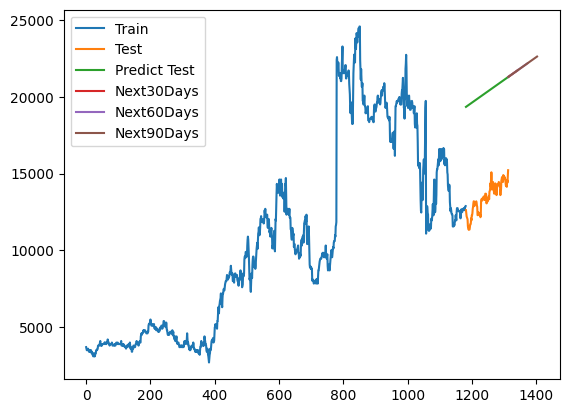

In [16]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()

DHT Historical Data

In [21]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [22]:
# 2. Load data
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [23]:
df

0        3700.0
1        3600.0
2        3500.0
3        3500.0
4        3500.0
         ...   
1308    14144.0
1309    14594.0
1310    14414.0
1311    14865.0
1312    15225.0
Name: Price, Length: 1313, dtype: float64

In [24]:
# 3. Split train, test
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [25]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [27]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [28]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [29]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [30]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[21309.78199703 21324.61504582 21339.44809461 21354.2811434
 21369.11419219 21383.94724098 21398.78028977 21413.61333856
 21428.44638735 21443.27943614 21458.11248492 21472.94553371
 21487.7785825  21502.61163129 21517.44468008 21532.27772887
 21547.11077766 21561.94382645 21576.77687524 21591.60992403
 21606.44297282 21621.27602161 21636.1090704  21650.94211919
 21665.77516798 21680.60821677 21695.44126556 21710.27431434
 21725.10736313 21739.94041192]
Predicted closing prices for the next 60 days:
[21309.78199703 21324.61504582 21339.44809461 21354.2811434
 21369.11419219 21383.94724098 21398.78028977 21413.61333856
 21428.44638735 21443.27943614 21458.11248492 21472.94553371
 21487.7785825  21502.61163129 21517.44468008 21532.27772887
 21547.11077766 21561.94382645 21576.77687524 21591.60992403
 21606.44297282 21621.27602161 21636.1090704  21650.94211919
 21665.77516798 21680.60821677 21695.44126556 21710.27431434
 21725.10736313 21739.

In [31]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 6901.351859278108
MAPE: 51.73473842303854
MSLE: 0.1753012611542276


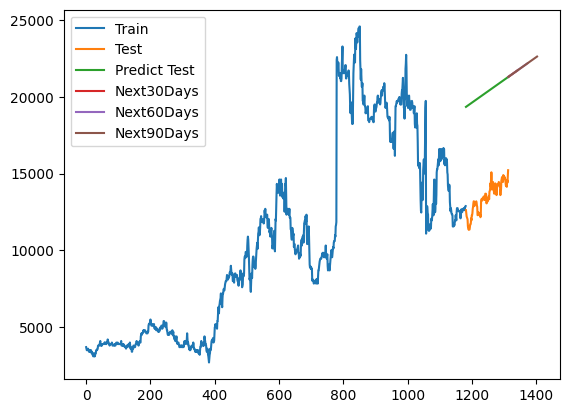

In [32]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()

DP3 Historical Data

In [33]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [34]:
# 2. Load data
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [35]:
df

0        3700.0
1        3600.0
2        3500.0
3        3500.0
4        3500.0
         ...   
1308    14144.0
1309    14594.0
1310    14414.0
1311    14865.0
1312    15225.0
Name: Price, Length: 1313, dtype: float64

In [36]:
# 3. Split train, test
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [37]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [39]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [40]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [41]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [42]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[21309.78199703 21324.61504582 21339.44809461 21354.2811434
 21369.11419219 21383.94724098 21398.78028977 21413.61333856
 21428.44638735 21443.27943614 21458.11248492 21472.94553371
 21487.7785825  21502.61163129 21517.44468008 21532.27772887
 21547.11077766 21561.94382645 21576.77687524 21591.60992403
 21606.44297282 21621.27602161 21636.1090704  21650.94211919
 21665.77516798 21680.60821677 21695.44126556 21710.27431434
 21725.10736313 21739.94041192]
Predicted closing prices for the next 60 days:
[21309.78199703 21324.61504582 21339.44809461 21354.2811434
 21369.11419219 21383.94724098 21398.78028977 21413.61333856
 21428.44638735 21443.27943614 21458.11248492 21472.94553371
 21487.7785825  21502.61163129 21517.44468008 21532.27772887
 21547.11077766 21561.94382645 21576.77687524 21591.60992403
 21606.44297282 21621.27602161 21636.1090704  21650.94211919
 21665.77516798 21680.60821677 21695.44126556 21710.27431434
 21725.10736313 21739.

In [43]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 6901.351859278108
MAPE: 51.73473842303854
MSLE: 0.1753012611542276


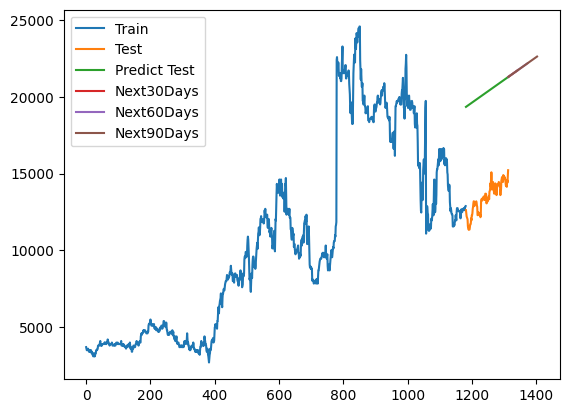

In [44]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()